# SciPy

---

**Autor:** César Husillos Rodríguez

**Email:** c.husillos@igme.es

---

SciPy es el acrónimo de **Sci**entific **Py**thon.

Es un paquete que se apoya en la funcionalidad de NumPy usando de forma extensiva tanto los arrays como las funciones disponibles para operar con ellos.

SciPy implementa módulos que realizan tareas de álgebra lineal, optimización, integración , agrupamientos y que dan acceso a funciones
especiales, distribuciones de probabilidad y constantes científicas, entre otros.

Toda la información sobre SciPy se encuentra disponible en la documentacion oficial, accesible a través de este enlace:
https://docs.scipy.org/doc/scipy/reference/main_namespace.html

In [1]:
import scipy
scipy.__version__

'1.13.0'

| Submódulo | Descripción |
| :-- | :-- |
| **cluster** | Algoritmos de clustering |
| **constants** | Constantes físicas y matemáticas. |
| fftpack | Rutinas de Transformadas Rápidas de Fourier. |
| **integrate** | Para integrar y resolver ecuaciones diferenciales ordinarias. |
| **interpolate** | Implementa rutinas de interpolación. |
| io | Entrada y salida (Input/Output). |
| **linalg** | Álgebra Lineal. |
| maxentropy  | Métodos de Máxima Entropía. |
| ndimage | Procesado de imágenes n-dimensionales. |
| odr | Ajustes a distancias ortogonales (Orthogonal Distance Regression). |
| **optimize** | Procedimientos de optimización y búsqueda de ceros (raíces) en funciones. |
| signal | Procesado de señal. |
| sparse | Matrices dispersas y rutinas asociadas. |
| spatial | Datos con estructura espacial y algorimos. |
| special | Funciones especiales. |
| stats | Distribuciones estadísticas y funciones. |
| weave | Integración con C/C++. |

## 1. Constantes matemáticas y físicas

SciPy proporciona un conjunto inmenso de **constantes físicas y matemáticas**, así como de **unidades** y sus **prefijos** (*kilo*, *giga*, *micro*...).

Provee también de una **función para la búsqueda de constantes** y otras para la **conversión entre algunas magnitudes** ($\lambda \leftrightarrow \nu$, p.e.).

El módulo que facilita toda esta información es *scipy.constants*.

In [2]:
from scipy import constants

In [3]:
# help(constants)

Se puede acceder a constantes, unidades y funciones de conversión directamente desde el módulo constants.

In [4]:
# help(constants.physical_constants)

In [5]:
constants.speed_of_light, constants.c, constants.atm, constants.Wien, \
constants.Avogadro, constants.pi, constants.g

(299792458.0,
 299792458.0,
 101325.0,
 0.002897771955,
 6.02214076e+23,
 3.141592653589793,
 9.80665)

También se puede acceder a prefijos de unidades

In [6]:
constants.tebi, constants.giga, constants.hecto, constants.femto, constants.nano

(1099511627776, 1000000000.0, 100.0, 1e-15, 1e-09)

O a la equivalencia de una medida en unidades cualesquiera a la equivalente en el Sistema Internacional

In [7]:
constants.oz, constants.inch, constants.gram, \
constants.gallon, constants.acre, constants.arcsecond, \
constants.foot, constants.day

(0.028349523124999998,
 0.0254,
 0.001,
 0.0037854117839999997,
 4046.8564223999992,
 4.84813681109536e-06,
 0.30479999999999996,
 86400.0)

O incluso, tiene implementadas funciones para transformar de unas unidades medidas en un sistema a otros sistemas de mediciones

In [8]:
constants.convert_temperature(20, old_scale='Celsius', new_scale='Kelvin')

293.15

In [9]:
constants.nu2lambda(constants.giga), \
constants.lambda2nu(700 * constants.nano)

(0.299792458, 428274939999999.94)

(Como ejercicio) Dado que $c=\lambda \cdot \nu$, entonces $\nu = \frac{c}{\lambda}$

In [10]:
constants.c / (700 * constants.nano) # Equivalencia de 700 nm a Hz ($s^{-1}$)

428274939999999.94

In [11]:
# help(constants.convert_temperature)

Pero también es posible acceder a las constantes físicas través del diccionario llamado *physical_constants* del módulo *constants*.

In [12]:
print(type(constants.physical_constants))

<class 'dict'>


In [13]:
print('Numero de constantes físicas registradas = ', \
      len(list(constants.physical_constants.keys())))

Numero de constantes físicas registradas =  442


In [14]:
keys_const = constants.physical_constants.keys()
# Imprimimos las 20 primeras
for k in list(keys_const)[:20]:
    print(f'{k} -> {constants.physical_constants[k]}')

Wien displacement law constant -> (0.0028977685, 'm K', 5.1e-09)
atomic unit of 1st hyperpolarizablity -> (3.20636151e-53, 'C^3 m^3 J^-2', 2.8e-60)
atomic unit of 2nd hyperpolarizablity -> (6.2353808e-65, 'C^4 m^4 J^-3', 1.1e-71)
atomic unit of electric dipole moment -> (8.47835309e-30, 'C m', 7.3e-37)
atomic unit of electric polarizablity -> (1.648777274e-41, 'C^2 m^2 J^-1', 1.6e-49)
atomic unit of electric quadrupole moment -> (4.48655124e-40, 'C m^2', 3.9e-47)
atomic unit of magn. dipole moment -> (1.8548019e-23, 'J T^-1', 1.6e-30)
atomic unit of magn. flux density -> (235051.756758, 'T', 7.1e-05)
deuteron magn. moment -> (4.33073482e-27, 'J T^-1', 3.8e-34)
deuteron magn. moment to Bohr magneton ratio -> (0.0004669754567, '', 5e-12)
deuteron magn. moment to nuclear magneton ratio -> (0.8574382329, '', 9.2e-09)
deuteron-electron magn. moment ratio -> (-0.0004664345548, '', 5e-12)
deuteron-proton magn. moment ratio -> (0.3070122084, '', 4.5e-09)
deuteron-neutron magn. moment ratio -> 

Para cada constante física:

* la **clave** es su nombre
* el **valor asociado** es una tupla con (valor numérico, unidades, precision).

Para una constante física dada, se accede a cada uno de los valores de la tupla en la forma que muestra el siguiente ejemplo.

In [15]:
constants.physical_constants['speed of light in vacuum']

(299792458.0, 'm s^-1', 0.0)

In [16]:
#help(constants)

Para una constante dada, podemos acceder a su valor, a las unidades en las que se mide y a la precisión de esa medida a través de funciones del módulo, como 

In [17]:
constants.value('speed of light in vacuum')

299792458.0

In [18]:
constants.unit('speed of light in vacuum')

'm s^-1'

In [19]:
constants.precision('speed of light in vacuum')

0.0

O también, accediendo a la tupla resultado de la búsqueda de una constante y seleccionando elementos individualmente

In [20]:
valor, unidades, precision = constants.physical_constants['electron mass']

print(f'valor = {valor}; unidades = {unidades}; precision = {precision}')

valor = 9.1093837015e-31; unidades = kg; precision = 2.8e-40


Se puede realizar una búsqueda aproximada.

In [21]:
constants.find('density') # devuelve una lista de claves que contienen al patrón introducido

['atomic unit of charge density', 'atomic unit of mag. flux density']

También dispone de funciones que permiten la transformación de unas unidades a otras

In [22]:
# help(constants)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios del 1 al 7.

---

## 2. Resolución de ecuaciones

Es un tema presente en diferentes dominios de la matemática aplicada y las ciencias de la computación.

Se trata, por tanto de un tema amplio que requiere la aplicación de teorías y enfoques de múltiples campos de las matemáticas. En particular, cuando se habla de la resolver ecuación tenemos que distinguir entre:
* **ecuaciones univariadas** (que contienen una variable desconocida) y 
* **ecuaciones multivariadas** (que contienen muchas variables desconocidas).

Además, necesitamos distinguir entre 
* **ecuaciones lineales** y
* **ecuaciones no lineales**. 

Esta clasificación es útil porque resolver ecuaciones de estos diferentes tipos requiere aplicar diferentes métodos y enfoques matemáticos.

El punto de partida natural son los **sistemas de ecuaciones lineales** porque son tremendamente útiles y tienen aplicaciones importantes en todos los campos de la ciencia. La razón de esta universalidad es que **la teoría del álgebra lineal nos permite resolver directamente ecuaciones lineales**, mientras que las ecuaciones no lineales son difíciles de resolver en general y normalmente requieren métodos más complicados y exigentes desde el punto de vista computacional. 

Dado que los sistemas lineales son fácilmente resolubles, también **son una herramienta importante para realizar aproximaciones locales de sistemas no lineales** (*desarrollos de Taylor*). Por ejemplo, al considerar pequeñas variaciones desde un punto de expansión, un sistema no lineal a menudo puede aproximarse mediante un sistema lineal en la vecindad local del punto de expansión. Sin embargo, **una linealización sólo puede describir propiedades locales** y, para el análisis global de problemas no lineales, se requieren otras técnicas. Estos métodos suelen emplear **enfoques iterativos para construir gradualmente un modelo cada vez más preciso** para la estimación de la solución.

En esta parte aprenderemos a resolver numéricamente sistemas de ecuaciones lineales usando el módulo de álgebra de SciPy.

### 2.1. Módulos necesarios

In [23]:
import scipy.linalg as la
from scipy import optimize

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 2.2. Sistemas de ecuaciones lineales

Un parte muy importante del álgebra lineal tiene su aplicación en la resolución de este tipo de sistemas.

En general, un sistema de ecuaciones lineales tiene esta forma

$$a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1$$
$$a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2$$
$$\dots $$
$$a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m$$

que está compuesto por **$m$ ecuaciones** que involucran **$n$ variables desconocidas** ${x_1, x_2,\dots , x_n}$, y donde $a_{mn}$ y $b_m$ son **constantes conocidas**.

La forma de trabajo implica escribir estas ecuaciones en formato matricial en la forma


\begin{equation}
\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{21} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n 
\end{pmatrix}
= 
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m 
\end{pmatrix}
\end{equation}

o simplemente $Ax=b$, donde $A$ es una matriz $m \times n$, $b$ es una matriz $m \times 1$ y $x$ es la matriz solución desconocida $n \times 1$.

Dependiendo de las propiedades de la matriz $A$ la solución al vector $x$ puede existir o no y, en caso de existir, podría no ser una solución única.



Según la relación entre el número de ecuaciones $m$ y de incógnitas $n$, se establecen varios tipos de sistemas lineales:

####  2.2.1. Sistemas lineales rectangulares

Se caracterizan porque el número de ecuaciones es distinto del de incógnitas. Esto es $m \neq n$.

Se subdividen a su vez en dos categorías:

1. **Subdeterminado**

Aquí se cumple que $m \lt n$. Implica que el número de ecuaciones es menor que el de incógnitas. No puede resolverse de forma única. Dicha solución viene dada en función de las variables libres que tienen por número la diferencia entre el número de incógnitas y la dimensión $m$ de la matriz del sistema (a menos que haya dependencia lineal en la matriz del sistema).

2. **Sobredeterminado**

Se cumple que  $m \gt n$. Disponemos de más ecuaciones que incógnitas. En general, no hay una solución exacta para este tipo de sistemas. Sin embargo, siempre se puede intentar encontrar una solución aproximada. Este tipo de sistemas se da en problemas de ajustes de datos.

Nos centraremos en sistemas sobredeterminados y trataremos de encontrar una solución tal que $Ax \approx b$. 

Para nosotros la mejor solución o *mejor ajuste* vendrá determinado por aquella aproximación que resulte en el valor mínimo posible de la suma de los cuadrados de los errores. Esto es, básicamente, una solución por ajuste de **minimos cuadrados** del sistema lineal, que proporciona por resultado la menor distancia entre los datos y la solución real.

En SciPy el procedimiento de ajuste por mínimos cuadrados lo realiza la función *scipy.linalg.lstsq*.

In [24]:
# help(la.lstsq)

De nuevo, usaremos un ejemplo para ilustrar el caso.

Supongamos que tenemos un modelo real de nuestro sistema, que viene dado por un polinomio de grado 2 en la forma $y = -1 + 2x - x^2$.

Solución = [-1.11217715  2.07846498 -0.99814307]


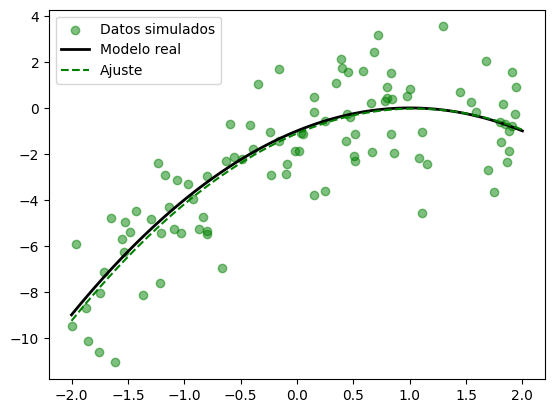

In [25]:
from numpy.random import default_rng

x = np.linspace(-2, 2, 100) 
y_exacta = -1 + 2*x - x**2

# Ahora voy a meter ruido aleatorio a los datos reales
rng = default_rng(seed=44444444)

# meto ruido en las coordenadas x
X = (1 - 2* rng.random(100)) * 2 # Posiciones aleatorias entre -1 y 1
Y = -1 + 2*X - X**2 +  rng.normal(0, 2, 100)

# Generamos la matriz del sistema lineal
A = np.vstack((X**0, X**1, X**2))
solucion, r, rank, sv = la.lstsq(A.T, Y)

print('Solución =', solucion)

y_ajustada = solucion[0] + solucion[1] * x + solucion[2] * x**2

# Muestro gráficamente el ajuste
fig, ax = plt.subplots()

ax.scatter(X, Y, alpha=0.5, color='green', label='Datos simulados')
ax.plot(x, y_exacta, color='black', lw=2, label='Modelo real')
ax.plot(x, y_ajustada, color='green', linestyle='--', label='Ajuste')

ax.legend(loc='best')
plt.show()



#### 2.2.2. Sistemas lineales cuadrados

La condición que se cumple aquí es que $m = n$, lo que se traduce en que el **número de ecuaciones es igual que el de incógnitas**.

* Estos sistemas **tienen solución única si la matriz $A$ no es singular**, es decir, es invertible. Para estas matrices, el valor de su rango coincide con el de su dimensión.

* Si el rango de la matriz es menor que su dimensión (o su deteminante es 0), **la matriz es singular y el sistema lineal podría no tener solución o infinitas soluciones**. Si el rango es igual a la dimensión de la matriz, ésta es no singular.


Si la matriz $A$ no es singular se puede afirmar con rotundidad que el sistema lineal tiene solución. Sin embargo, no podemos asegurar que sea posible encontrar esa solución de forma exacta a menos que el llamado ***condition number*** (cond(A)) sea igual o esté muy proximo a 1. El *condition number* mide lo bien o mal que se comporta el sistema de ecuaciones lineales cuando consideramos pequeñas variaciones de la solución. Si el comportamiento es bueno, entonces $a(x+\delta x) = b + \delta b$. Cuanto mayor sea el *condition number* peor será la precisión de la solución alcanzada.

Resumiendo, el rango de la matriz, el *condition number*, el determinante y la norma de un array 2D (o matriz) se pueden calcular usando el módulo *np.linalg* y las siguientes funciones, respectivamente:

En el fondo, **resolver un sistema lineal es encontrar el punto, línea o superficie de corte de las figuras geométricas definidas por cada ecuación que forma parte del sistema**. Veamos un ejemplo.

Dado el sistema de ecuaciones lineales

$x + y  = 3$

$2x - y = 0$

Se transforma a sistema de ecuaciones en la forma

\begin{equation}
\begin{pmatrix}
1 & 1 \\
2 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
= 
\begin{pmatrix}
3 \\
0 \\
\end{pmatrix}
\end{equation}

Se comprueba que el rango de la matriz de coeficientes sea igual a 2, se verifica que su *condition number* sea próximo a 1 y se resuelve de la forma que se muestra abajo.

In [26]:
A = np.array([[1, 1], [2, -1]], dtype='int')
print(A)

[[ 1  1]
 [ 2 -1]]


Generamos también el vector de términos independientes *b*.

In [27]:
b = np.array([3, 0])
print(b)

[3 0]


Comprobamos el rango de la matriz de sistema lineal.

In [28]:
import numpy.linalg as la
print(la.matrix_rank(A))

2


¡Perfecto! nuestro sistema es no singular. Tenemos un sistema formado por dos ecuaciones con dos incógnitas. Seguro que encontramos una solución.

Comprobamos el valor del *condition number*.

In [29]:
print(la.cond(A))

1.7675918792439989


Es bastante próximo a 1, el valor ideal.

In [30]:
la.det(A) # calculamos el determinate

-2.9999999999999996

Y resolvemos haciendo uso de la función *solve* de *scipy.linalg*.

In [31]:
# Solución del sistema
solucion = la.solve(A, b)
print(solucion)

[1. 2.]


Para finalizar, podemos comprobamos que la solución verifica el sistema de ecuaciones lineales planteadas.

In [32]:
# Comprobamos
A.dot(solucion)

array([3., 0.])

Ya sólo nos queda graficar el sistema de ecuaciones.

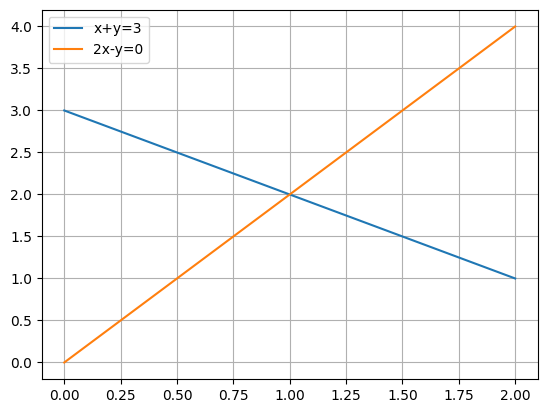

In [33]:
# Como mi solución es (x,y) = (1, 2), genero posiciones de x en torno a 1
x = np.linspace(-0, 2, 10)

fig, ax = plt.subplots()
# Grafico la primera ecuación del sistema
ax.plot(x, 3 - x, label='x+y=3')
# Gráfico de la segunda ecuación del sistema
ax.plot(x, 2*x, label='2x-y=0')

ax.legend(loc='best')
ax.grid()

# Muestro la gráfica
plt.show()

**RESUMEN:** 

El punto central de este apartado teórico-práctico que hay que interiorizar, es que **para resolver un sistema lineal de forma numérica tenemos que hacer uso de la función *solve* de *np.linalg***. Esta función puede resolver el sistema o no, en cuyo caso nos lo hará saber. Eso no quiere decir que lo apliquemos a lo loco. El valor del *rango* y del *condition number* nos darán una idea previa de si habrá solución y cómo de precisa será en caso de que se encuentre.

La búsqueda de soluciones con la función *solve* puede mejorarse si aportamos información adicional a la función en forma de parámetros. Consulte la documentación de esta función para obtener más información.

In [34]:
# help(la.solve)

La función

realiza la descomposición del array A (N x N) dimensional. 

Devuelve una tupla con dos elementos: *(valores propios, vectores propios)*

Supongamos el sistema que viene representado por la matriz

\begin{pmatrix}
2 & 4\\
1 & 3
\end{pmatrix}

vamos a calcular su descomposición en valores y vectores propios.

In [35]:
A = np.array ([[2 , 4], [1, 3]])
eigval, eigvect = la.eig(A)
print('Valores propios:', eigval[0], eigval[1])
print('Primer vector propio: ', eigvect[:, 0]) # eigenvectores en columnas
print('Segundo vector propio: ', eigvect[:, 1])
mod_eigvect1 = np.dot(eigvect[:, 0], eigvect[:, 0].T)
print('Módulo del primer vector propio:', mod_eigvect1) # modulo del vector propio 1
mod_eigvect2 = np.dot(eigvect[:, 1], eigvect[:, 1].T) # modulo del vector propio 2
print('Módulo del segundo vector propio:', mod_eigvect2) # modulo del vector propio 2

print('El producto de vectores propios es:', np.dot(eigvect[:, 0], eigvect[:, 1].T))

Valores propios: 0.4384471871911697 4.561552812808831
Primer vector propio:  [-0.93153209  0.36365914]
Segundo vector propio:  [-0.84212294 -0.5392856 ]
Módulo del primer vector propio: 1.0
Módulo del segundo vector propio: 0.9999999999999998
El producto de vectores propios es: 0.588348405414552


---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 8, 9, 10 y 11.

---

## 3. Optimización

La optimización *es el proceso de encontrar y seleccionar el elemento óptimo de un conjunto de candidatos factibles*. 

**En matemáticas**, este problema se refiere a **determinar el valor extremo de una función en un dominio determinado**. 

**Un valor extremo**, o un valor óptimo, puede referirse al **mínimo o** al **máximo de la función**. En este apartado nos ocuparemos de la optimización de funciones de valores reales de una o varias variables. Opcionalmente pueden estar sujetas a un conjunto de restricciones que limiten el dominio de la función.

SciPy contiene en su módulo *optimize* la función

que proporciona una interfaz común para todos los algoritmos de minimización que se apliquen sobre funciones multivariables escalares (que devuelven una sola variable).

| Parámetro | Tipo | Descripción |
| :-- | :-- | :-- |
| fun |Función | El nombre de una función a minimizar. |
| x0 | ndarray | Punto inicial al partir del que se busca el mínimo. |
| args | tupla | Parámetros extra de la *fun* y sus derivadas si lo necesitara. |
| method | string | Método de busqueda de mínimo. Posibilidades: <br /> *'Nelder-Mead'*, *'Powell'*, *'CG'*, *'BFGS'*, *'Newton-CG'*, *'Anneal'*, *'L-BFGS-B'*, *'TNC'*, *'COBYLA'* y *'SLSQP'*.|
| jac | Función, string o booleano | * Si es una función representará la derivada de 'fun' y tendrá los mismos parámetros.<br />* Si es una cadena de caracteres puede tomar los valores: *'2-point'*, *'3-point'*, *'cs'*, que estima el jacobiano usando métodos de diferencias finitas. <br />* Si es True se supone que *fun* devuelve una tupla: (valor de la función, valor de su jacobiano). <br />* Si es False o None, el *jac* se estima numéricamente usando el método '2-point'. <br /> |
| hess | Función | Hessiano de *fun*. (Sólo para el método de *Newton-CG*.) |
| hessp | Función | Hessiano de *fun* por un vector arbitrario p. (*Newton-CG*.) |
| bounds | secuencia | (Sólo para *L-BFGS-B*, *TNC*, *COBYLA* y *SLSQP*) Límites para las variables de la *fun* de entrada. <br />Por cada variable de *fun* se pasan un par de valores en forma de tupla (min\|None, max\|None). |
| constraints | dict o seq. of dict | (Consultar documentación).|
| tol | Float | Tolerancia por debajo de la cual se detienen las iteraciones.|
| options | diccionario | Las opciones aceptadas por todos los métodos excepto el *TNC* son: <br />* *maxiter* (int) número máximo de iteraciones. Para *TNC* usar *maxfun*; <br />* *disp* (bool) Si es True, muestra información de convergencia del algoritmo. |

In [36]:
import scipy.optimize

In [37]:
# help(scipy.optimize.minimize)

Veamos algunos ejemplos

In [38]:
from scipy.optimize import minimize
#  f(x) = (3+x) ^2 +1
# Funcion escalar de una sola variable
def parabola(x):
    return (3 + x)**2 + 1  

# esto es f'''(x) = 2(3+x)
# jacobiano de la funcion
def parabola_derivada(x):
    return 2 * (3 + x)  

# esto es f''(x) = 2
# hessiano de la función
def parabola_derivada_segunda(x):
    return 2

res = minimize( parabola, 202.34, method = 'Nelder-Mead', options = {'disp': True })
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 25
         Function evaluations: 50


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0000000001205318
             x: [-3.000e+00]
           nit: 25
          nfev: 50
 final_simplex: (array([[-3.000e+00],
                       [-3.000e+00]]), array([ 1.000e+00,  1.000e+00]))

Podemos acceder a cada uno de los parámetros del informa de esta forma

In [39]:
print('Terminado con éxito =', res.success, type(res.success))
print('mínimo en x =', res.x, type(res.x))
print('valor de la función en el mínimo =', round(res.fun, 2), type(res.fun))
print('número de iteraciones =', res.nit, type(res.nit))

Terminado con éxito = True <class 'bool'>
mínimo en x = [-3.00001098] <class 'numpy.ndarray'>
valor de la función en el mínimo = 1.0 <class 'numpy.float64'>
número de iteraciones = 25 <class 'int'>


Podemos probar otros métodos de minimización de los disponibles en el parámetro *method* de *minimize*.

In [40]:
res = minimize(parabola, 202.34, method = 'BFGS', options = {'disp': True })
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0000000000000002
        x: [-3.000e+00]
      nit: 5
      jac: [-1.490e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 16
     njev: 8

Este método es mucho más rápido que el anterior. Lo es porque calcula el jacobiano de la función a minimizar.

Probamos a pasarle el Jacobiano de forma explícita. Vemos el resultado del proceso de minimización.

In [41]:
res = minimize(parabola, 202.34, method = 'BFGS', \
               jac = parabola_derivada, options = {'disp': True })
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0
        x: [-3.000e+00]
      nit: 4
      jac: [ 1.421e-14]
 hess_inv: [[ 5.000e-01]]
     nfev: 7
     njev: 7

Vemos como, a medida que le proporcionamos más información, el proceso de minimización se acelera.

In [42]:
res = minimize(parabola, 202.34, method = 'BFGS', \
               jac = parabola_derivada, options = {'disp': True })
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0
        x: [-3.000e+00]
      nit: 4
      jac: [ 1.421e-14]
 hess_inv: [[ 5.000e-01]]
     nfev: 7
     njev: 7

Probamos un método más.

In [43]:
res = minimize(parabola, 202.34, method = 'Newton-CG', \
               jac = parabola_derivada, \
               options = {'disp': True})
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 5
         Hessian evaluations: 0


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.0
       x: [-3.000e+00]
     nit: 2
     jac: [ 3.052e-07]
    nfev: 3
    njev: 5
    nhev: 0

Resuelto el problema de minimización en sólo dos iteraciones.

In [44]:
res = minimize(parabola, 202.34, method = 'Newton-CG', \
               jac = parabola_derivada, \
               hess=parabola_derivada_segunda, \
               options = {'disp': True})
res

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 2
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 2


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.0
       x: [-3.000e+00]
     nit: 2
     jac: [ 0.000e+00]
    nfev: 2
    njev: 2
    nhev: 2

El Hessiano no mejora el proceso porque ya es rapidísimo.

### 3.1. Mínimos locales

**Pregunta:** ¿Qué sucede si hay mínimos o máximos locales en la función?

Pongamos como ejemplo una función coseno amortiguada.
$$ f(x) = cos(x)e^{\frac{-x}{\pi}}$$

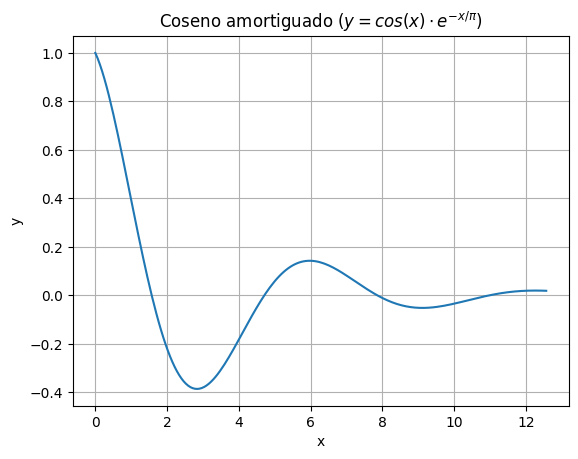

In [45]:
def coseno_amortiguado(x):
    return np.cos(x) * np.exp(-x / np.pi)

x = np.linspace(0, 4 * np.pi, 200)

plt.close()
fig, ax = plt.subplots()

ax.plot(x, coseno_amortiguado(x))
ax.set_title(r'Coseno amortiguado ($y = cos(x) \cdot e^{-x / \pi}$)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

Definimos el Jacobiano y el Hesiano de la función.

In [46]:
def cos_amort_jacobiano(x):
    return -1 * ( np.sin(x) + np.cos(x) / np.pi) * np.exp(- x / np.pi)

def cos_amort_hessiano(x):
    return np.exp(-x / np.pi) * ((1 / np.power(np.pi ,2) -1) * np.cos(x) + 2 * np.sin(x) / np.pi)

Y optimizamos

In [47]:
res = minimize(coseno_amortiguado, np.pi / 2, method = 'Newton-CG', \
               jac = cos_amort_jacobiano, hess = cos_amort_hessiano, \
               options ={'disp': True })
res

Optimization terminated successfully.
         Current function value: -0.386678
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 5


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.386678374313314
       x: [ 2.833e+00]
     nit: 5
     jac: [-5.428e-08]
    nfev: 6
    njev: 6
    nhev: 5

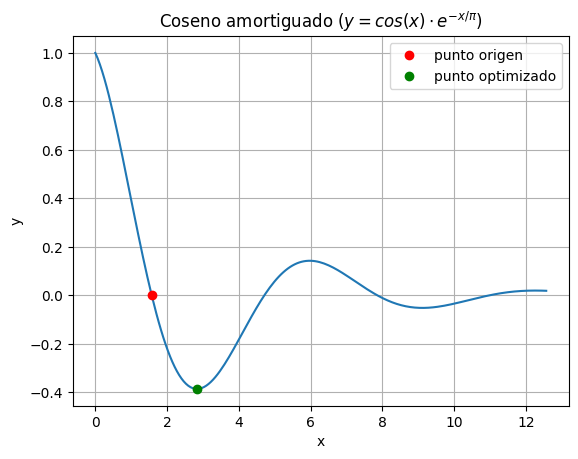

In [48]:
x = np.linspace(0, 4 * np.pi, 200)

plt.close()
fig, ax = plt.subplots()

ax.plot(x, coseno_amortiguado(x))
ax.set_title(r'Coseno amortiguado ($y = cos(x) \cdot e^{-x / \pi}$)')
ax.plot(np.pi / 2, coseno_amortiguado(np.pi / 2), marker='o', color='red', linestyle='', label='punto origen')
ax.plot(res.x, res.fun, marker='o', color='green', linestyle='', label='punto optimizado')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.legend()
plt.show()

¡Perfecto! Hemos dado con el mínimo absoluto. Pero, ¿y si cambio mi punto de origen de busqueda?

In [49]:
punto_origen = 12
res = minimize(coseno_amortiguado, punto_origen, method = 'Newton-CG', \
               jac = cos_amort_jacobiano, hess = cos_amort_hessiano, \
               options ={'disp': True })
res

Optimization terminated successfully.
         Current function value: -0.052331
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
         Hessian evaluations: 4


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.05233122730916528
       x: [ 9.117e+00]
     nit: 4
     jac: [-3.488e-10]
    nfev: 8
    njev: 8
    nhev: 4

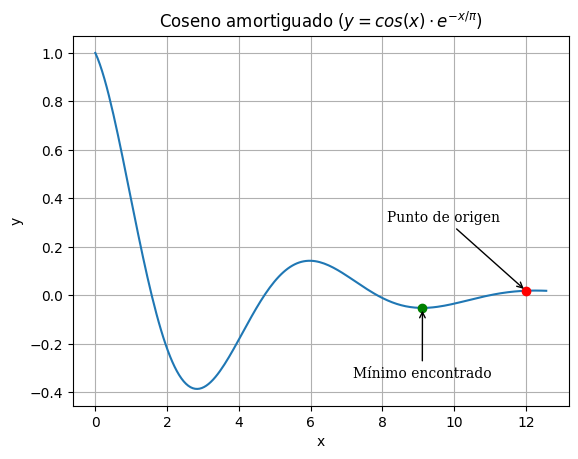

In [50]:
x = np.linspace(0, 4 * np.pi, 200)

plt.close()
fig, ax = plt.subplots()

ax.plot(x, coseno_amortiguado(x))
ax.set_title(r'Coseno amortiguado ($y = cos(x) \cdot e^{-x / \pi}$)')
ax.plot(punto_origen, coseno_amortiguado(punto_origen), marker='o', color='red', linestyle='', label='punto origen')
ax.plot(res.x, res.fun, marker='o', color='green', linestyle='', label='punto optimizado')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.annotate("Punto de origen", fontsize=10, family="serif", \
            xy=(punto_origen, coseno_amortiguado(punto_origen)), \
            xycoords="data", xytext=(-100, +50), textcoords="offset points", \
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"))
ax.annotate("Mínimo encontrado", fontsize=10, family="serif", \
            xy=(res.x, res.fun), \
            xycoords="data", xytext=(-50, -50), textcoords="offset points", \
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"))
# ax.legend()
plt.show()

Como vemos, el mínimo encontrado depende del punto origen seleccionado.

**Pregunta 1:** ¿Qué tendriamos que hacer para encontrar todos los mínimos de esta función dentro del rango $[ -4\pi, 4\pi ]$?
Lanzando semillas y haciendo optimize

**Pregunta 2:** ¿Qué tendríamos que hacer para encontrar todos los máximos en el rango anterior?
Hay que poner un signo menos a la funcion para lo q ue sea positivo sea negativo, y viceversa

In [51]:
# otra opcion es con brute
res= optimize.brute(coseno_amortiguado, [(0,12)])
print(res)

[2.8333933]


### 3.2. Optimización en un intevalo

Aún nos falta restringir el rango de búsqueda de valores mínimos.

Hagamos un ejemplo con una función sencilla: la función $cos(x)$.

Graficamos la función.

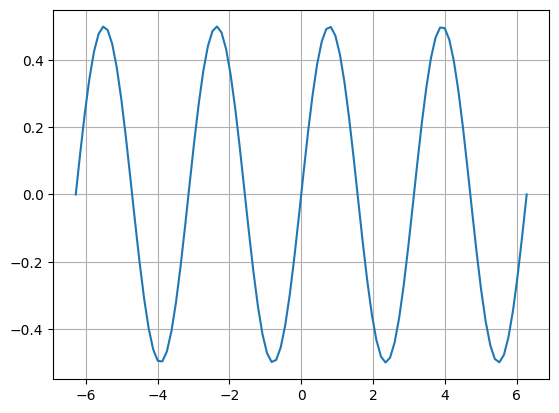

In [52]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
fig, ax = plt.subplots()
ax.grid()
ax.plot(x, np.cos(x) * np.sin(x))
plt.show()

Vamos a restringir nuestra búsqueda de mínimos en el intervalo [1, 2]. Nuestro punto de origen será $x=1$.

In [53]:
def mi_funcion(x):
    return np.cos(x) * np.sin(x)

def mi_jacobiano(x):
    return np.power(np.cos(x), 2) - np.power(np.sin(x), 2)

punto_origen = 1.1
res = minimize(mi_funcion, punto_origen, method = 'L-BFGS-B', \
               jac = mi_jacobiano, bounds=[(1, 2)],  
               options ={'disp': True })
res
# en bounds salen los limites
#  mensaje que ha parado porque le he dicho que pare, pero no ha encontrado menor que la tolerancia
# sabe que la derivada de la funcion en un maximo o minomo es cero, y que no ha llegado, lo sabe por el jacobiano, y sabe que no ha llegado, por eso saca ese mensaje

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.37840124765396416
        x: [ 2.000e+00]
      nit: 2
      jac: [-6.536e-01]
     nfev: 3
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [54]:
help(scipy.optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Muestro en una gráfica el resultado.

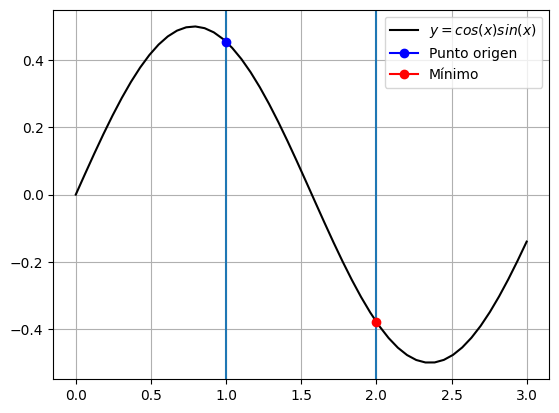

In [55]:
x = np.linspace(0, 3, 50)
fig, ax = plt.subplots()
# línea de la función
ax.plot(x, np.cos(x) * np.sin(x), color='black', label=r'$y=cos(x)sin(x)$')
# líneas verticales para los límites
ax.axvline(1)
ax.axvline(2)
# Puntos representativos
ax.plot(1, np.cos(1) * np.sin(1), marker='o', color='blue', label='Punto origen')
ax.plot(res.x, res.fun , marker='o', color='red', label='Mínimo')
ax.grid()
ax.legend()
plt.show()

### 3.3 Problemas no lineales de mínimos cuadrados

Ya hemos visto antes problemas lineales de mínimos cuadrados y hemos explorado cómo se usan para resolver problemas de álgebra lineal.

En general un problema de mínimos cuadrados puede considerarse como la optimización de la función objetivo 
$$g(\beta) = \sum^m_{i=0}r_i(\beta)^2 = \|r(\beta)\|^2$$
donde $r_i(\beta)$ es el vector de resíduos $r_i(\beta) = y_i - f(x_i\beta)$ para un conjunto de observaciones $(x_i, y_i)$. Aquí $\beta$ es un vector de parámetros desconocidos especificado por la función $f(x, \beta)$. Si esta problema es no lineal en los parámetros $\beta$, se denomina como un *problema no lineal de mínimos cuadrados*, y no puede resolverse con las técnicas de álgebra lineal, pero sí con las técnias de optimización multivariable ya vistas como los métodos de Newton o quasi-Newton con alguna modificación. Se emplea el *método de Levenverg-Marquardt* que se basa en la idea de linealizaciones sucesivas del problema en cada iteración.

En SciPy la función

proporciona una forma de resolver estos *problemas no lineales de mínimos cuadrados* que usa el método *método de Levenverg-Marquardt*, pero usaremos una interfaz alternativa a través de la función 

que elimina la necesidad de edfinir la función de residuos a minimizar.

Veamos un ejemplo, que siempre ayuda.

In [56]:
from numpy.random import default_rng
import numpy as np
from scipy import optimize

rng = default_rng(seed=443321)

def funcion_incognita(x, a0, a1, a2):
    return a0 + a1 * np.exp(-a2 * x**2)
    
x = np.linspace(0, 5, 50)
y = funcion_incognita(x, 0.25, 0.75, 0.5)

# metemos algo de ruido
y_ruidosa = y + 0.05 * rng.random(x.size)

parametros_optimizados, parametros_cov = optimize.curve_fit(funcion_incognita, x, y_ruidosa)
print(parametros_optimizados)
print(parametros_cov)
#  los parametros cov te dicen los errrores que ha tenia

[0.26900594 0.74700374 0.4793216 ]
[[ 7.72949973e-06 -5.64226360e-06  1.38764701e-05]
 [-5.64226360e-06  3.17518826e-05  1.35118747e-05]
 [ 1.38764701e-05  1.35118747e-05  8.90098018e-05]]


Graficamos el resultado que siempre ayuda a entender el resultado.

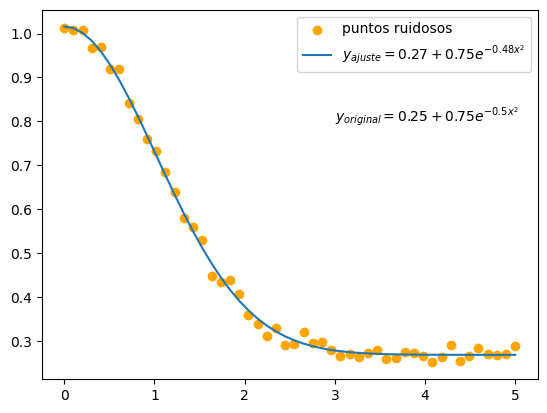

In [57]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x, y_ruidosa, color='orange', label='puntos ruidosos')
# genero un alias para parametros_optimizados
po = parametros_optimizados
etiqueta = '$y_{ajuste}=' + str(round(po[0], 2)) + ' + ' + str(round(po[1], 2)) + 'e^{-' + str(round(po[2], 2)) + 'x^2}$'
ax.plot(x, funcion_incognita(x, *parametros_optimizados), label=etiqueta) #  expante la variable parametros opt
ax.text(3, 0.8, r'$y_{original} = 0.25 + 0.75e^{-0.5x^2}$')
ax.legend()
plt.show()

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 12, 13 y 14.

---

## 4. Interpolación

### 4.1. Conceptos

La **interpolación** es un método matemático para construir una función a partir de un conjunto discreto de puntos de datos.
La función de interpolación, o interpolante, debe coincidir exactamente con los puntos de datos dados y también puede evaluarse para otros valores de entrada intermedios dentro del rango muestreado.

Hay muchas aplicaciones de la interpolación:
* Un caso de uso típico que proporciona una imagen intuitiva es el trazado de una curva suave a través de un conjunto dado de puntos de datos.
* Otro caso de uso es aproximar funciones complicadas, cuya evaluación, por ejemplo, podría ser exigente desde el punto de vista computacional. En ese caso, puede resultar beneficioso evaluar la función original solo en un número limitado de puntos y utilizar la interpolación para aproximar la función al evaluarla en puntos intermedios.

**Ajuste por minimos cuadrados**. Aunque la interpolación puede parecerse mucho al ajuste de mínimos cuadrados, también existen importantes diferencias conceptuales que distinguen estos dos métodos: 

* En el ajuste de mínimos cuadrados, estamos interesados en ajustar aproximadamente una función a puntos de datos de manera que se minimice el suma de errores cuadrados, usando muchos puntos de datos y un sistema de ecuaciones sobredeterminado. 

* En la interpolación, por otro lado, requerimos una función que coincida exactamente con los puntos de datos dados y solo use la cantidad de puntos de datos que sea igual a la cantidad de parámetros libres en la función de interpolación. 

Por lo tanto, el ajuste de mínimos cuadrados es más adecuado para ajustar una gran cantidad de puntos de datos a una función de modelo, y la interpolación es una herramienta matemática para crear una representación funcional para un número mínimo determinado de puntos de datos.

La **extrapolación** es un concepto que está relacionado con la interpolación. Se refiere a evaluar la función estimada fuera del rango muestreado, mientras que la interpolación solo se refiere a evaluar la función dentro del rango que abarcan los puntos de datos dados.

La extrapolación a menudo puede ser más arriesgada que la interpolación, porque implica estimar una función en una región donde no se ha muestreado.

En este apartado sólo nos ocupamos de la interpolación. Usaremos los módulos
* *polinomial* de NumPy, y 
* *interpolate* de SciPy.

### 4.2. Polinomios en NumPy

In [58]:
from numpy import polynomial as p

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Es posible construir un polinomio pasando una lista o un array de coeficientes, de menor a mayor grado.

In [59]:
pol = p.Polynomial([-3, 2, 1])
pol

Polynomial([-3.,  2.,  1.], domain=[-1,  1], window=[-1,  1], symbol='x')

También es posible generar un polinomio a partir de sus raices.

In [60]:
pol1 =  p.Polynomial.fromroots([-1, 2])
pol1

Polynomial([-2., -1.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Podemos obtener fácilmente las raíces de un polinomio cualquiera.

In [61]:
pol.roots()

array([-3.,  1.])

In [62]:
pol1.roots()

array([-1.,  2.])

**¿Cómo se evalúa un polinomio?**

Simplemente pasando entre paréntesis un array de coordenadas en las que queremos evaluarlo.

In [63]:
pol(np.array([0, 1, 2]))

array([-3.,  0.,  5.])

Se pueden realizar operaciones aritméticas con polinomios de forma sencilla.

In [64]:
pol2 = p.Polynomial([0, 1])
pol2

Polynomial([0., 1.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [65]:
pol3 = p.Polynomial([-1, 1])
pol3

Polynomial([-1.,  1.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [66]:
pol

Polynomial([-3.,  2.,  1.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [67]:
print(pol + pol2) 
print(pol - pol2)
print(pol * pol2)
print(pol // pol3) # División de polinomios: pol = (x - 1) * (x + 3) y pol3 = x - 1

-3.0 + 3.0 x + 1.0 x**2
-3.0 + 1.0 x + 1.0 x**2
0.0 - 3.0 x + 2.0 x**2 + 1.0 x**3
3.0 + 1.0 x


La clase *Polynomial* genera polinomios en la base clásica, pero es posible usar otras bases conocidas, como los polinomios de Chebyshev, Legendre, Hermite o Laguerre.

In [68]:
c = p.Chebyshev.fromroots([-1, 2])
c

Chebyshev([-1.5, -1. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [69]:
l = p.Legendre.fromroots([-1, 2])
l

Legendre([-1.66666667, -1.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [70]:
# Comparamos con la base de polinomio estándar
pol1 =  p.Polynomial.fromroots([-1, 2])
pol1

Polynomial([-2., -1.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Todos los coeficientes son diferentes enrte sí, pese a que tienen las mismas raíces.

Ahora los evaluamos en los mismos puntos.

In [71]:
print('Chebyshev: ', c(np.array([0, 1, 2])))
print('Legendre: ', l(np.array([0, 1, 2])))
print('Serie de potencias estándar: ', pol1(np.array([0, 1, 2])))

Chebyshev:  [-2. -2.  0.]
Legendre:  [-2. -2.  0.]
Serie de potencias estándar:  [-2. -2.  0.]


Aunque la base es diferente, la evaluación de cualquier punto produce el mismo resultado.

Consulte más información en la documentación oficial de NumPy: https://numpy.org/doc/stable/reference/routines.polynomials.classes.html

### 4.3. Interpolación polinómica en la práctica

Supongamos que tenemos el siguiente polinomio:

$x \cdot (2 - x  +  x^2)$

Lo evaluamos en los puntos x=(-3,-1, 0, 2, 4, 6), obteniendo las coordenadas y.

Queremos generar un polinomio que interpole los puntos obtenidos. Luego compararemos ambos polinomios: original e interpolado.

0.0 - 2.0 x - 1.0 x**2 + 1.0 x**3


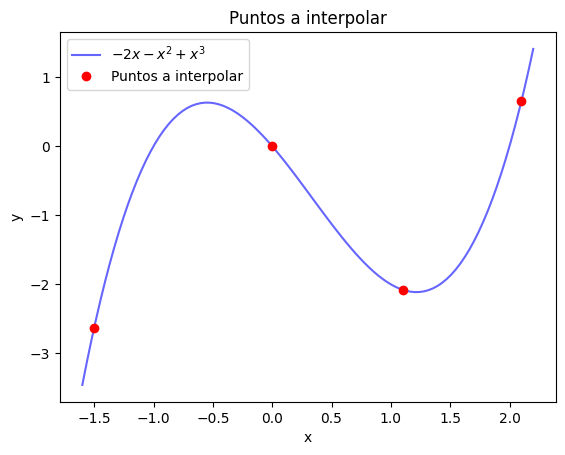

In [72]:
# polinomio original
p_original = p.Polynomial.fromroots([-1, 0, 2])
print(p_original)
#puntos a interpolar
x = np.array([-1.5, 0, 1.1, 2.1])
y = p_original(x)

#graficamos el polinomio original y los puntos que deseamos usar para interpolación
plt.close()

x_range = np.linspace(-1.6, 2.2, 100)

fig, ax = plt.subplots()
ax.plot(x_range, p_original(x_range), color='blue', alpha=0.6, label="$- 2 x - x^2 + x^3$")
ax.plot(x, y, color='red', marker='o', linestyle='', label='Puntos a interpolar')
ax.set_title('Puntos a interpolar')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.show()

Dado que tenemos cuatro puntos, necesitaremos como mínimo un sistema lineal de tercer grado (número de puntos - 1).

In [73]:
# help(p.Polynomial.fit)

In [74]:
grado = len(x) - 1
print('grado =', grado)
print('x =', x)

grado = 3
x = [-1.5  0.   1.1  2.1]


In [75]:
#generamos el polinomio de interpolación a partir de los puntos de interpolación
# Lo primero es establecer las ecuaciones del sistema lineal a partir de las coordenadas x de los puntos de interpolación
A = p.polynomial.polyvander(x, grado)
# Seguidamente, resolvemos el sistema de ecuaciones considerando las coordenadas y
c = linalg.solve(A, y)
print('Coeficientes del polinomio de interpolación =', c)
# esto devuelve los coeficientes del polínomio de interpolación del grado especificado

Coeficientes del polinomio de interpolación = [ 1.11022302e-15 -2.00000000e+00 -1.00000000e+00  1.00000000e+00]


In [76]:
# generamos el polinomio de interpolación a partir de esos coeficientes
p_interp = p.Polynomial(c)
p_interp

Polynomial([ 1.11022302e-15, -2.00000000e+00, -1.00000000e+00,  1.00000000e+00], domain=[-1,  1], window=[-1,  1], symbol='x')

Evaluamos en los puntos de interpolación este polinomio obtenido

In [77]:
y_interp = p_interp(x)
y_interp

array([-2.62500000e+00,  1.11022302e-15, -2.07900000e+00,  6.51000000e-01])

Ahora, represento ambos polinomios junto con los puntos de interpolación.

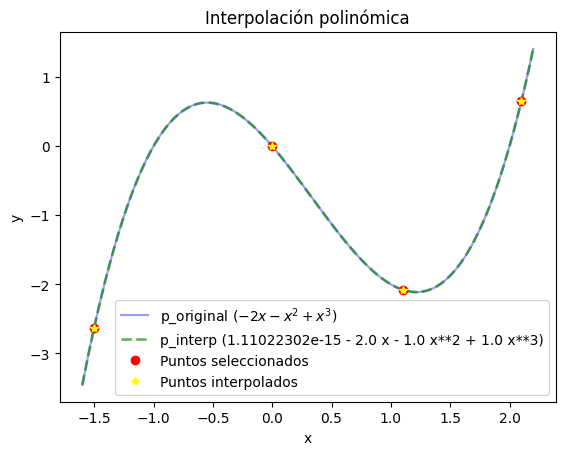

In [78]:
#puntos a interpolar
x = np.array([-1.5, 0, 1.1, 2.1])
y = p_original(x)

#graficamos el polinomio original y los puntos que deseamos usar para interpolación
#plt.close()

x_range = np.linspace(-1.6, 2.2, 100)

fig, ax = plt.subplots()
ax.plot(x_range, p_original(x_range), color='blue', alpha=0.4, label="p_original ($- 2 x - x^2 + x^3$)")
ax.plot(x_range, p_interp(x_range), color='green', linestyle='--', linewidth=2, alpha=0.6, label=f'p_interp ({p_interp})')
ax.plot(x, y, color='red', marker='o', linestyle='', label='Puntos seleccionados')
ax.plot(x, y_interp, color='yellow', marker='*', linestyle='', label='Puntos interpolados')
ax.set_title('Interpolación polinómica')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.show()

Obtenemos exactamente la misma solución y coordenadas de los puntos a interpolar que los originales. Eso es porque hemos obtenido la solución exacta ya que hemos trabajado con un sistema de ecuaciones linealmente independientes y dispuesto de tantos puntos como incógnitas para resolverlo.

Veamos qué pasa si variamos el grado del polinomio de interpolación.

In [79]:
grado = 5
print('grado =', grado)

nx = np.array([-2., -1, 0., 0.5, 1.1, 3.])
ny = p_original(nx)
print('nx =', nx)

grado = 5
nx = [-2.  -1.   0.   0.5  1.1  3. ]


In [80]:
#generamos el polinomio de interpolación a partir de los puntos de interpolación
# Lo primero es establecer las ecuaciones del sistema lineal a partir de las coordenadas x de los puntos de interpolación
A = p.polynomial.polyvander(nx, grado)
# Seguidamente, resolvemos el sistea de ecuaciones considerando las coordenadas y
c = linalg.solve(A, ny)
print('Coeficientes del polinomio de interpolación =', c)
# esto devuelve los coeficientes del polínomio de interpolación del grado especificado
# generamos el polinomio de interpolación a partir de esos coeficientes
p_interp4 = p.Polynomial(c)
p_interp4

Coeficientes del polinomio de interpolación = [ 2.66453526e-15 -2.00000000e+00 -1.00000000e+00  1.00000000e+00
  3.49033315e-16 -1.05947683e-16]


Polynomial([ 2.66453526e-15, -2.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        3.49033315e-16, -1.05947683e-16], domain=[-1,  1], window=[-1,  1], symbol='x')

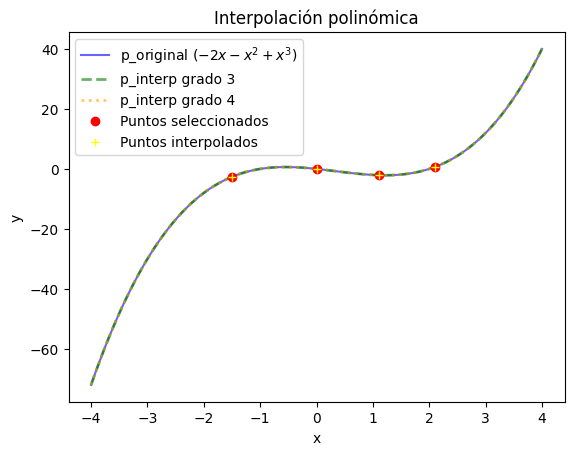

In [81]:
#puntos a interpolar
x = np.array([-1.5, 0, 1.1, 2.1])
y = p_original(x)

#graficamos el polinomio original y los puntos que deseamos usar para interpolación
plt.close()

x_range = np.linspace(-4, 4, 100)

fig, ax = plt.subplots()
ax.plot(x_range, p_original(x_range), color='blue', alpha=0.6, label="p_original ($- 2 x - x^2 + x^3$)")
ax.plot(x_range, p_interp(x_range), color='green', linestyle='--', linewidth=2, alpha=0.6, label='p_interp grado 3')
ax.plot(x_range, p_interp4(x_range), color='orange', linestyle=':', linewidth=2, alpha=0.6, label='p_interp grado 4')
ax.plot(x, y, color='red', marker='o', linestyle='', label='Puntos seleccionados')
ax.plot(x, y_interp, color='yellow', marker='+', linestyle='', label='Puntos interpolados')
ax.set_title('Interpolación polinómica')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.show()

Nada cambia porque básicamente estamos en el mismo rango de interpolación y estamos obteniendo el mismo polinomio. La solución exacta.

In [82]:
p_interp4

Polynomial([ 2.66453526e-15, -2.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        3.49033315e-16, -1.05947683e-16], domain=[-1,  1], window=[-1,  1], symbol='x')

### 4.4. Interpolación en SciPy

Veremos ejemplos de:
    
* Interpolación-1D.
* Interpolación de datos multivariables (2D).
* Interpolación con splines: en 1D y 2D.

En todos los casos usamos el módulo *scipy.interpolate*.

#### 4.4.1. Interpolación 1D

La función a usar es

| Parámetro | Tipo | Descripción |
| :--- | :--- | :--- |
| x | array | Array de números ordenados de forma monótona creciente.|
| y | array | Array o matriz de valores reales. El tamaño de *y* a lo largo del eje de interpolación debe ser el mismo que el de x.|
| kind | string o entero | Si es string puede tomar valores entre: 'linear','nearest', <br /> 'zero', 'slinear', 'quadratic' o 'cubic'. Si es entero especifica el orden del *spline* usado para interpolar. |

**Retorna una función**. Cuando se la llama, realiza la interpolación.

In [83]:
from scipy.interpolate import interp1d

x = np.array([-2, -1 , 0, 1, 2, 3])
y = np.exp(x)

# Interpolamos usando varios tipos
flin = interp1d(x, y)
print(type(flin))
fqua = interp1d(x, y, kind = 'quadratic')
fcub = interp1d(x, y, kind = 'cubic')
fnea = interp1d(x, y, kind = 'nearest')

# obtenemos los valores y para cada función de interpolación obtenida
newx = np.linspace(-2, 3, 100)
newylin = flin(newx)
newyqua = fqua(newx)
newycub = fcub(newx)
newynea = fnea(newx)

<class 'scipy.interpolate._interpolate.interp1d'>


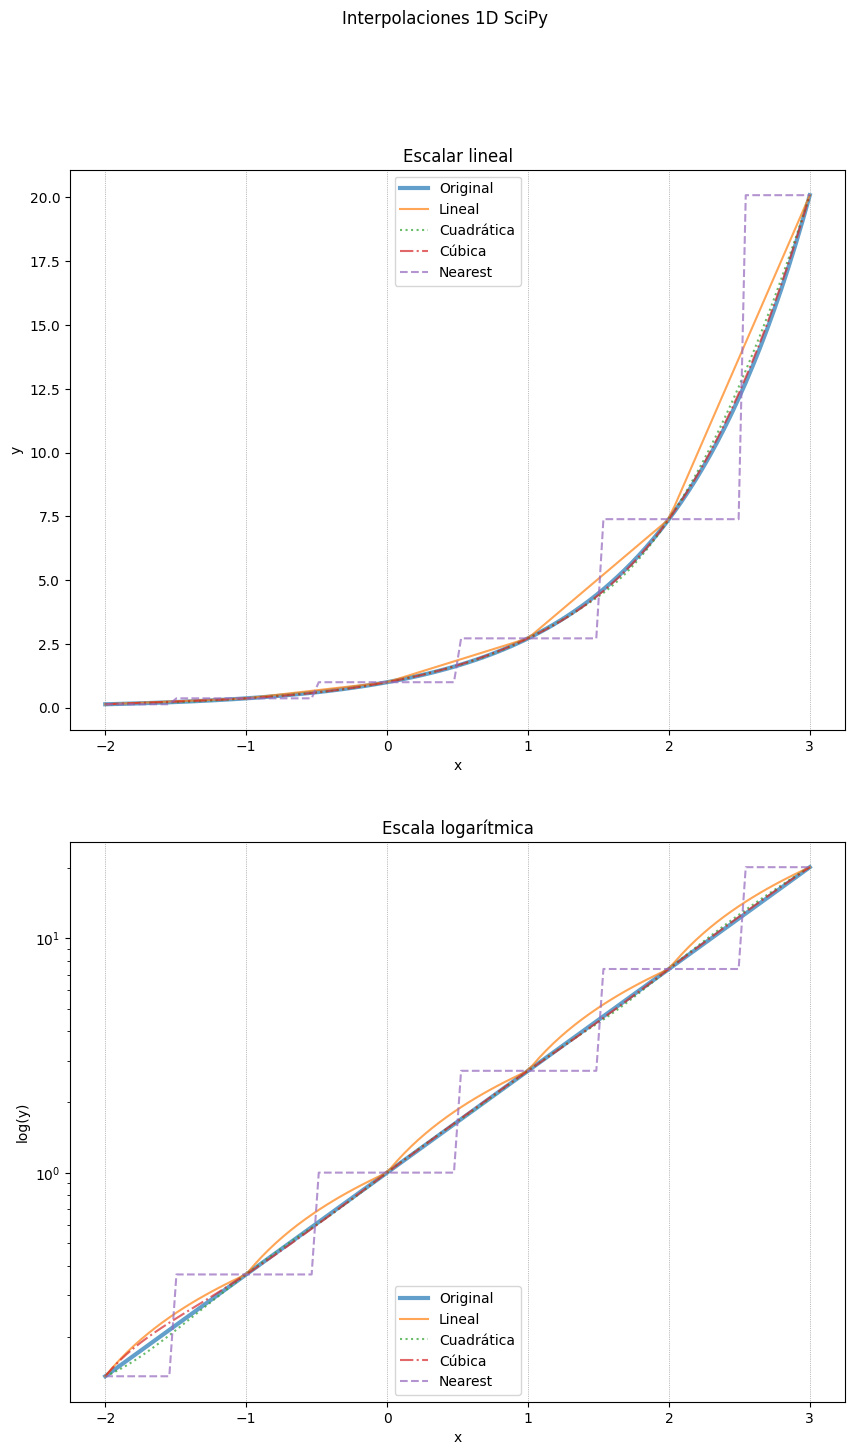

In [84]:
# mostramos los resultados gráficamente
plt.close()

fig, ax = plt.subplots(2, 1, figsize=(10, 16))
fig.suptitle('Interpolaciones 1D SciPy')

# Escala lineal en el primer eje
ax[0].plot(newx, np.exp(newx),alpha=0.7, linestyle='-', linewidth=3, label='Original')
ax[0].plot(newx, newylin, alpha=0.7, linestyle='-', label='Lineal')
ax[0].plot(newx, newyqua, alpha=0.7, linestyle=':', label='Cuadrática')
ax[0].plot(newx, newycub, alpha=0.7, linestyle='-.', label='Cúbica')
ax[0].plot(newx, newynea, alpha=0.7, linestyle='--', label='Nearest')

ax[0].set_title('Escalar lineal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
for pos in x:
    ax[0].axvline(pos, linestyle=':', linewidth=0.5, color='gray')

ax[0].legend(loc='best')

# Escala logartímica en el axis Y para el segundo eje
ax[1].semilogy(newx, np.exp(newx),alpha=0.7, linestyle='-', linewidth=3, label='Original')
ax[1].semilogy(newx, newylin, alpha=0.7, linestyle='-', label='Lineal')
ax[1].semilogy(newx, newyqua, alpha=0.7, linestyle=':', label='Cuadrática')
ax[1].semilogy(newx, newycub, alpha=0.7, linestyle='-.', label='Cúbica')
ax[1].semilogy(newx, newynea, alpha=0.7, linestyle='--', label='Nearest')

ax[1].set_title('Escala logarítmica')
ax[1].set_xlabel('x')
ax[1].set_ylabel('log(y)')
for pos in x:
    ax[1].axvline(pos, linestyle=':', linewidth=0.5, color='gray')

ax[1].legend(loc='best')
plt.show()

In [85]:
# help(interp1d)

Se aprecia con claridad que en los puntos usados para la interpolación todas las interpolaciones coinciden con el valor proporcionado.

#### 4.4.2. Interpolación 2D

La función a usar es

donde

| Parámetro | Tipo | Descripción |
| :--- | :--- | :--- | 
| points | array | Coordenadas de los puntos. Puede ser un array de tamaño (n, D), o una tupla de ndim arrays. |
| values | array |Array de Float o complex y dimensión (n,). |
| xi | array | Puntos a los cuales interpolar los datos. Shape (M,D). |
| method | string | A elegir entre 'linear', 'nearest' o 'cubic'. (Ver documentación).|
| fill | value | Valor usado para asignar los puntos fuera del dominio convexo dado por points. No afecta al método "nearest".|

Devuelve un array con los valores interpolados.

In [86]:
import numpy as np
from scipy.interpolate import griddata
from matplotlib import pyplot as plt

In [87]:
#help(griddata)

Veamos el trabajo de esta función en acción.

In [88]:
# Función a interpolar
def func (x, y):
    return np.sinc(np.sqrt(np.power(x, 2) + np.power(y, 2)))

In [89]:
# generación de malla espacial
intvx = np.linspace(0, 3, 100)
intvy = np.linspace(0, 3, 200)
grid_x, grid_y = np.meshgrid(intvx, intvy)

In [90]:
# muestreamos 1000 puntos en el área que cubre la malla
points = np.random.rand(1000, 2) * 3

In [91]:
# evaluamos los valores de esos puntos con nuestra función sinc
values = func(points[:, 0], points[:, 1])

In [92]:
# Interpolamos esos valores usando la función griddata de scipy.interpolate usando varios métodos
grid_z0 = griddata(points, values, (grid_x, grid_y), method = 'nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method = 'linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method = 'cubic')

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Cubic')

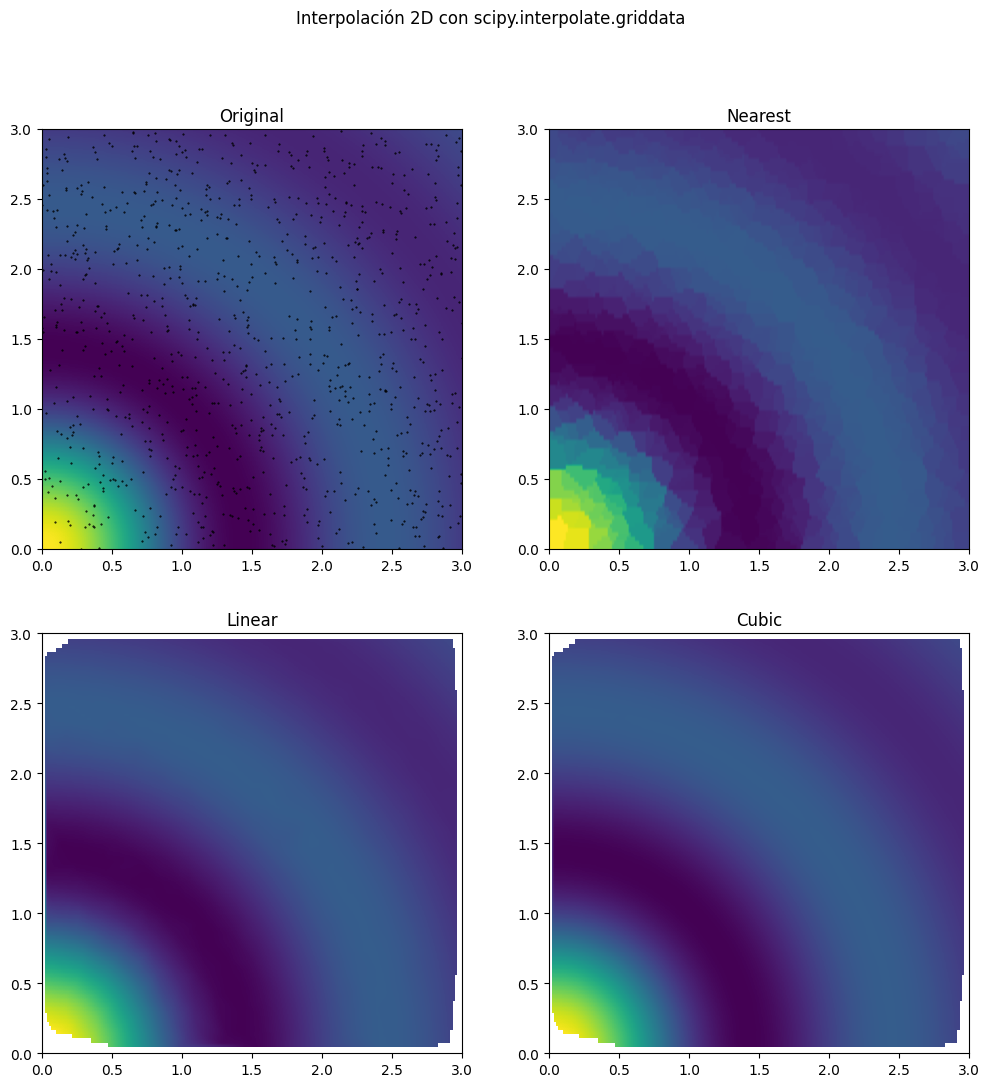

In [93]:
# Generamos una figura con la función original y los puntos tomados para interpolar, y el resultado de las interpolaciones
# plt.close()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Interpolación 2D con scipy.interpolate.griddata')

print(type(axs))
axs[0, 0].imshow(func(grid_x, grid_y).T, extent= (0, 3, 0, 3), origin = 'lower')
axs[0, 0].plot(points[:, 0], points[:, 1], color='black', linestyle='', marker='.', ms = 1)
axs[0, 0].set_title('Original')

axs[0, 1].imshow(grid_z0.T, extent = (0, 3, 0, 3), origin = 'lower')
axs[0, 1].set_title('Nearest')

axs[1, 0].imshow(grid_z1.T, extent = (0, 3, 0, 3), origin = 'lower')
axs[1, 0].set_title('Linear')

axs[1, 1].imshow(grid_z2.T, extent = (0, 3, 0, 3), origin = 'lower')
axs[1, 1].set_title('Cubic')

# plt.show()

Como puede apreciarse en la imagen, los algoritmos de interpolación lineal y cubico tienen "efectos de borde".

#### 4.4.3. Interpolación usando SPLINES

Un spline es una función que está formada por varios polinomios, cada uno definido sobre un subintervalo, que se unen entre sí obedeciendo a ciertas condiciones de continuidad.

Supongamos que disponemos de $n + 1$ puntos, a los que denominaremos **nudos**, tales que $t_0 < t_1 < \dots < t_n$. Y supongamos además que se ha fijado un entero $k > 0$. Decimos entonces que una función spline de grado $k$ con nudos en $t_0; t_1; \dots ; t_n$ es una función $S$ que satisface las condiciones:
1. en cada intervalo $(t_{i-1}, t_i)$, $S$ es un polinomio de grado menor o igual a $k$.
2. $S$ tiene una derivada de orden $(k - 1)$ continua en $[t_0, t_n]$.

La función para interpolación por Splines a partir de una muestra de puntos es

En el que, dado un conjunto de puntos $(x_i, y_i)$ se aproxima a un spline de grado $k$ en en intervalo $x_b \leq x \leq x_e$.

Si no se le pide que muestre la salida completa, devuelve una tupla de tres elementos $(t, c, k)$ donde:
* $t$ es el array de los nudos, 
* $c$ representa los coeficientes del spline, y 
* $k$ es el grado del spline.

In [1]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

In [95]:
#help(interpolate.splrep)

Ahora que tenemos definido el Spline a partir de los puntos de muestreo, para interpolar a cualquier otro punto del intervalo usaremos la función 

que evalúa el spline (*der=0*) o sus derivadas (*der>0*), según el spline "tck" en los puntos dados por el array "x". El parámetro "ext" controla qué valor se devuelve en el caso de que algún punto de "x" esté fuera del intervalo en el que el intervalo está definido (extrapolación).

En caso de duda, consulte la documentación de la función.

In [96]:
#help(interpolate.splev)

Veamoslo en acción trabajando en la interpolación de la función trigonométrica seno (*sin*).

In [2]:
# Definimos el rango y obtenemos los valores de la función
x = np.arange(0, 2 * np.pi, np.pi / 5) # trabajamos en el intervalo [0, 2*pi)
y = np.sin(x)

In [3]:
# Rango ampliado: queremos ver cómo se comporta el spline fuera del rango en el que se definió
wide_x = np.linspace(-np.pi / 4, 9 * np.pi / 4, 100) # rango en [-pi/4, 2.25*pi)
wide_y = np.sin(wide_x)

In [4]:
# generamos el Spline a partir de los puntos de seleccionados
tck = interpolate.splrep(x, y, s = 0)

In [5]:
# Usamos el Spline para interpolar en nuevos puntos del rango
interp_wide_y = interpolate.splev(wide_x, tck, der = 0)

Text(0, 0.5, 'y')

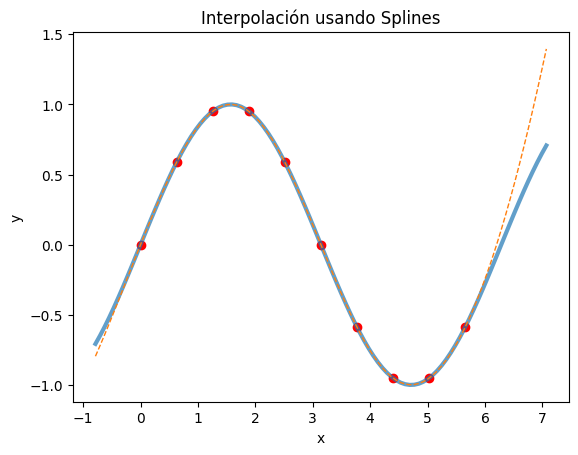

In [6]:
# representamos la función seno y el spline obtenido en el intervalo amplio
fig, axs = plt.subplots()

axs.plot(x, y, ls='', marker='o', color='red', label='Puntos interpolación')
axs.plot(wide_x, wide_y, lw=3, ls='-', alpha=0.7, label='sin(x)')
axs.plot(wide_x, interp_wide_y, lw=1, ls='--', label='spline')

axs.set_title('Interpolación usando Splines')
axs.set_xlabel('x')
axs.set_ylabel('y')

En esta gráfica se ve perfectamente que los Splines funcionan perfectamente dentro el rango de interpolación, pero no sirven para inferir valores fuera de este rango. Es decir, no son precisos ni recomendables para extrapolar.

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 15 y 16.

---

## 5. Integración

Nuestro problema es evaluar las integrales definidas en la forma

$$I(f)= \int_a^b f(x)dx$$

donde $f(x)$ es el integrando y $[a, b]$ es el intervalo de integración.

A efectos prácticos, se trata de determinar el área encerrada bajo la función $f(x)$ dentro del intervalo definido por $[a, b]$. La integral puede ser:
* finita ($a$ y $b$ finitos),
* semi-infinitas ($a = -\infty$ o $b = \infty$), o
* infinitas ($a = -\infty$ y $b = \infty$).

![Área bajo curva](./imagenes/scipy/integral.png)

Dependiendo de las propiedades del integrando y de los límites de integración, puede ser simple o complicado el cálculo numérico de la integral.

Las integrales de funciones contínuas con límites de integración finitos pueden calcularse muy eficientemente en 1D. La dificultad se incrementa con el número de variables de la función. En la práctica, los métodos tradicionales de computación numérica funcionan para integrales de hasta 3D. Las de mayor dimensión requieren técnicas completamente diferentes tales como algoritmos de muestreo de Monte Carlo.


La estrategia para evaluar numéricamente una integral $I(f)$ consiste en escribir la integral como una suma discreta que aproxime el valor de la integral en la forma:

$$I(f) = \sum^n_{i=1} w_if(x_i) + r_n$$

donde
lo que vale la funcion en cada uno de los interavalos uqe defino, mas un error
* $w_i$ son los pesos resultantes de N-evaluaciones de $f(x)$ en los puntos $x_i \in [a, b]$, y
* $r_n$ es el residuo debido a la aproximación.

  Este sumatorio se llama **Regla de cuadratura** y la elección del número de puntos $n$, su localización en $[a, b]$ y los pesos $w_i$ influyen en la precisión y complejidad computacional del cálculo de la integral.

![Reglas de cuadratura](./imagenes/scipy/reglas_cuadratura.jpg)

En integración numérica con SciPy hay que distinguir entre:

1. rutinas que toman como integrando una función, y
2. rutinas que toman como parámetro un array.

Las primeras usan *Cuadratura Gaussiana*. Las segundas usan métodos de tipo *Newton-Cotes* que consisten en un grupo de fórmulas de integración numérica de tipo interpolatorio, en las cuales se evalúa la función en puntos equidistantes, para así hallar un valor aproximado de la integral (https://es.wikipedia.org/wiki/F%C3%B3rmulas_de_Newton-Cotes). Un ejemplo de este tipo de métodos es el mostrado en la figura de arriba. 

|Tipo de integrando | Función de SciPy |
| :---- | :--- |
| función | *quad*       |
|         | *quadrature* |
|         | *fixed_quad* |
| array   | *trapz*      |
|         | *simps*      |
|         | *romb*       |

El subpaquete

proporciona todas estas rutinas para integrar funciones de una o varias variables. También para integrar ecuaciones diferenciales ordinarias.

### 5.1. Integración de funciones

Pongamos ejemplos, que así es como se aprende.

Por probar, vamos a calcular la integral de la función constante e igual a 1, en un intervalo finito dado por $[0, 1]$.

La función

sirve para integrar la función pasada como argumento (*func*) de una variable entre dos puntos (
$a$ y $b$). *args* es una tupla con parámetros adicionales para func.

Esta función retorna una tupla: *(valor de la integral, estimación del error absoluto en el resultado)*

In [102]:
#help(integrate.quad)

In [7]:
from scipy import integrate

Ejemplo sencillo de integración de una función constante e igual a 1 en todo el rango de variabilidad.

In [9]:
res = integrate.quad(lambda x: 1, 0, 1) # en el rango entre 0 y 1, es 1
print(res)
res = integrate.quad(lambda x: 1, 0, 2) # en el rango entre 0 y 2, es 2
print(res)

(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


Ahora, pongamos como ejemplo una función a la que se le pasan parámetros. Integraremos en el intervalo $[-1, 1]$.

In [10]:
def parabola (x, x0 = 0, y0 = 0):
    return (x - x0)**2 + y0

In [11]:
res = integrate.quad(parabola, -1, 1, args=(1,2))
print(res)

(6.666666666666667, 7.401486830834378e-14)


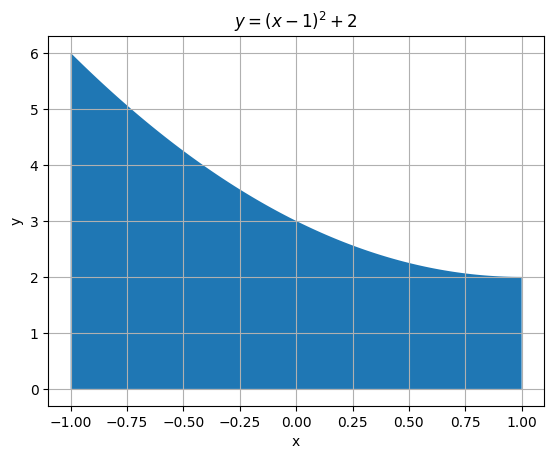

In [12]:
# Represento gráficamente el intevalo integrado
x = np.linspace(-1, 1, 100)
y = parabola(x, x0 = 1, y0 = 2)

fig, ax = plt.subplots()
ax.fill_between(x, y)
ax.grid()
ax.set_title(r'$y = (x-1)^2 + 2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Ahora vamos a extender las dimensiones de la integración a dos. En este caso la integral a resolver sería algo así

$$I(f) = \int^a_b\int^{g(x)}_{h(x)}(f(x, y)dxdy$$

donde 
* $f(x, y)$ es una función que depende de dos variables,
* $[a, b]$ define el intervalo de integración de la variable $x$, y
* $[g(x), h(x)]$ definen el intervalo de integración de la variable $y$ y, como se ve, esos límites dependen de la variable $x$.

La función que realiza este tipo de integración para funciones en SciPy es

Como ejemplo, integraremos la función $\int^1_0 \int^1_0 e^{-x^2 - y^2} dxdy$.

Mostramos el área de interés en la siguiente gráfica.

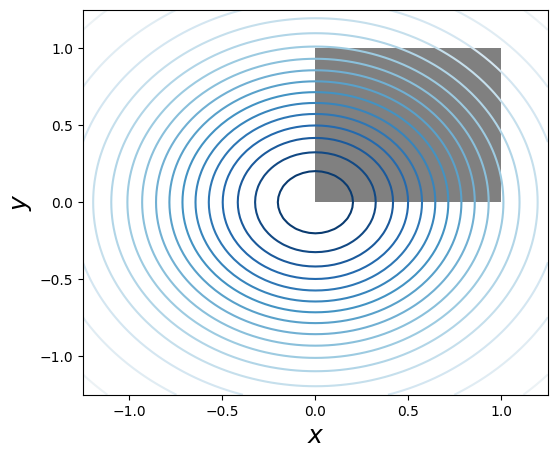

In [18]:
import matplotlib as mpl
def f(x, y):
    return np.exp(-x**2 - y**2)

fig, ax = plt.subplots(figsize=(6, 5))
x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)
c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
plt.show()

Y ahora vamos a codificar la integral

In [109]:
# Limites de integración
a, b = 0, 1
g = lambda x: 0
h = lambda x: 1

# integramos
integrate.dblquad(f, a, b, g, h)

(0.5577462853510337, 8.291374381535408e-15)

Esto mismo es generalizable a un espacio 3D. Ahora nuestra integral sería

$$I(f) = \int^a_b\int^{g(x)}_{h(x)}\int^{r(x,y)}_{q(x,y)}f(x, y, z)dxdydz$$

donde 
* $f(x, y)$ es una función que depende de dos variables,
* $[a, b]$ define el intervalo de integración de la variable $x$, y
* $[g(x), h(x)]$ definen el intervalo de integración de la variable $y$ y, como se ve, esos límites dependen de la variable $x$.
* $[r(x,y), q(x,y)]$ definen el intervalo de integración de la variable $z$. La dependencia ahora de esos límites viene dada por funciones que dependen de las otras dos: $x$ e $y$.

La función que se encargaría de realizar la integración es

A modo de ejemplo, integraremos la función $\int^1_0 \int^1_0 \int^1_0 e^{-x^2 - y^2 - z^2} dxdydz$ en el siguiente ejemplo.


In [110]:
# Codificación de la función en Python
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

# definición de límites de integración
a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y: 1

# integración
integrate.tplquad(f, 0, 1, g, h, q, r)

(0.4165383858866382, 8.291335287314424e-15)

### 5.2. Integración de arrays

En muchas situaciones no disponemos de una función que integrar, sino de datos obtenidos de la experimención que incluso pueden no estar separados a distancias equidistantes en el intervalo de interés.

Como hemos mencionado, en estos casos usaremos métodos de *Newton-Cotes* para realizar la integración.

Trabajaremos, por ejemplo, con la función *trapz* del módulo *scipy.integrate*, que se define como

y donde 
* $y$, son los valores de la variable dependiente
* $x$, son los valores de la variable independiente
* $dx$, es el intervalo entre medida y medida, en caso de ser equidistantes.

Nos vamos a simplificar la vida y supongamos, para probar a seleccionar puntos cualesquiera de la función constante e igual a 1 en el rango $[0, 1]$. Veremos si obtenemos una integral de valor próxima a la unidad.

In [19]:
x = np.array([0.0, 0.1, 0.3, 0.4, 0.8, 1.0])
y = np.ones_like(x)

integrate.trapz(y, x)

C:\Users\Julia\AppData\Local\Temp\ipykernel_10984\1858495171.py:4: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integrate.trapz(y, x)


1.0

In [112]:
# help(integrate.trapezoid)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 17 y 18.

---

## 6. Clustering

Los algoritmos de agrupamiento son útiles en teoría de la información, detección de objetivos, comunicaciones, compresión y otras áreas.

Este subpaquete es parte de SciPy y se subdivide a su vez en dos módulos:

| Módulo | Descripción|
| :-- | :-- |
| *vq* | El módulo *vq* solo admite la cuantificación vectorial (*vector quantization*) y los algoritmos k-means.|
| *hierarchy* | El módulo de jerarquía proporciona funciones para agrupación jerárquica y aglomerativa. <br />Permite: <br /> - la generación de grupos jerárquicos a partir de matrices de distancia, <br /> - el cálculo de estadísticas sobre grupos, <br /> - el corte de vínculos para generar grupos planos, y <br /> - la visualización de grupos con dendrogramas.  |

Comencemos por un caso práctico: suponga que hemos obtenido un conjunto de datos y que al respresentarlos hemos obtenido algo como esto.

[-4.84765007  0.52745692 -3.74132348 -2.51834647 -2.15068661 -3.4817693
 -4.7355854  -0.7022144  -1.27788377 -5.90572613]


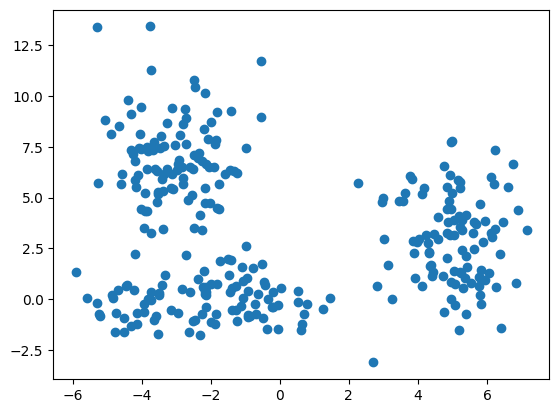

In [113]:
import numpy.random as random
from matplotlib import pyplot as plt

# Generador e números aleatorios
rng = random.default_rng(12345) # semilla a valor constante para garantizar reproducibilidad

x = np.concatenate((rng.normal(-2, 2, 100), rng.normal(5, 1, 100), rng.normal(-3, 1, 100)))
y = np.concatenate((rng.normal(0, 1, 100), rng.normal(3, 2, 100), rng.normal(7, 2, 100)))

print(x[:10]) 

fig, ax = plt.subplots()
ax.scatter(x, y)

plt.show()

Parece que las observaciones se agrupan en dos o más conjuntos. **¿Cómo hago para separarlas en diferentes grupos según su distribución espacial?**

Dos paquetes realizan este tipo de tareas:
1. *scipy.clustering.vq*, que soporta técnicas de vector quantization y algoritmo k-means.
2. *scipy.clustering.hierarchy*, que permite realizar agrupamientos por aglomeraciones y jerarquías.

### 6.1. Agrupamiento por K-medias

En el algoritmo k-means se necesitan dos parámetros de entrada:
1. el conjunto de datos a agrupar.
2. el número de grupos a generar.

Los datos son normalmente arrays-2D de dimensión M x N, donde M es el número de objetos y N es el número de datos del que se
dispone para cada objeto.

Dado el número de grupos, el algoritmo trabaja asignando unas coordenadas al centro de cada uno de los grupos y asignando el
identificador a cada objeto en función del grupo cuyo centro esté más próximo. Esto es lo que se denomina cuantificar vectores
(*vector quantization*).

scipy.cluster.vq.kmeans(obs, k or guess, iter=20, thresh=1e-05)

|Parámetro | Tipo | Descripción |
| :--- | :---- | :--- |
| obs | np.ndarray | de dimensión M x N (M observaciones con N datos cada una).|
| k or guess | entero o array | Si es entero, es el número de grupos. Los centros se inicializan aleatoriamente entre las observaciones. <br />Si es un array, se inicializan los centros a esas k posiciones (k x N).|
| iter | entero |  Número de iteracciones.|
| thresh | entero | Termina las iteraciones si la distorsión (suma de las distancias al <br />cuadrado entre cada observación y su centroide dominante) cambia menos que este valor.| 


|Parámetro de retorno | Tipo | Descripción |
| :--- | :--- | :--- |
|codebook | np.ndarray | Array k x N, con las coordenadas de los centroides que minimizan la distorsión. |
|distorsion | Float | Suma de las distancias al cuadrado entre cada observación y su centroide dominante. |

In [114]:
from scipy import cluster
import numpy as np

Antes de pasar las observaciones al algoritmo de agrupamiento, los datos deben ser tratados para que su varianza por en cada columna de datos sea igual a 1.

Esta tarea la realiza la función *whiten* de *scipy.cluster*.

Donde *obs* es un array con los datos (en filas los puntos/objetos de interés y en columnas, cada una de sus características (coordenadas espaciales, temperatura, color...).

Devuelve un array con las mismas dimensiones que *obs*, pero con los valores de *obs* escalados por la desviación estándar de cada columna.

In [115]:
# help(cluster.vq.kmeans)

In [116]:
# Damos el formato adecuado a la muestra
data = np.concatenate((x.reshape(300, 1), y.reshape(300, 1)), axis=1)

# "escalo" los datos de entrada para que la varianza de cada columna sea igual a 1.
whitened = cluster.vq.whiten(data)

# determino la desviación estándar de cada columna. Veremos más abajo el motivo...
std = [data[:, i].std() for i in range(data.shape[1])]

print('Varianzas de las columnas = ', var)
# Agrupo
codebook, distorsion = cluster.vq.kmeans(whitened, 2)
code_w, dist_w = cluster.vq.vq(whitened, codebook)
code_d, dist_d = cluster.vq.vq(data, codebook)

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# puntos de un grupo normalizados
axs[0].scatter(whitened[:, 0].compress(code_w == 0) , whitened[:, 1].compress(code_w == 0) , c='blue', alpha = 0.3, label='grupo 1')
# puntos del otro grupo
axs[0].scatter(whitened[:, 0].compress(code_w == 1) , whitened[:, 1].compress(code_w == 1) , c='red', alpha = 0.3, label='grupo 2')
# centroides
axs[0].scatter(codebook[:, 0], codebook[:, 1] , c='green', label='centroides')
axs[0].set_title('Datos normalizados')
axs[0].legend(loc='best')

# puntos de un grupo
axs[1].scatter(data[:, 0].compress(code_d == 0) , data[:, 1].compress(code_d == 0) , c='blue', alpha = 0.3, label='grupo 1')
# puntos del otro grupo
axs[1].scatter(data[:, 0].compress(code_d == 1) , data[:, 1].compress(code_d == 1) , c='red', alpha = 0.3, label='grupo 2')
# centroides
# axs[1].scatter(codebook[:, 0] * std[0], codebook[:, 1] * std[1], c='green', label='centroides')
axs[1].scatter(codebook[:, 0], codebook[:, 1], c='green', label='centroides')
axs[1].set_title('Datos reales')
axs[1].legend(loc='best')

plt.show()

NameError: name 'var' is not defined

Y, de esta forma, ya tenemos agrupados en dos conjuntos las observaciones realizadas. Cada elemento de un conjunto tiene propiedades (en este caso coordenadas) que los relacionan entre ellos y los diferencian de los del otro.

Quizá, dos no sea el número de grupos adecuado. El centroide del grupo azul parece estar en una zona vacía. Es como si se pudiera dividir en dos grupos más. Intentamos agrupar en tres conjuntos. 

In [ ]:
n_groups = 3
# Damos el formato adecuado a la muestra
data = np.concatenate((x.reshape(300, 1), y.reshape(300, 1)), axis=1)

# "escalo" los datos de entrada para que la varianza de cada columna sea igual a 1.
whitened = cluster.vq.whiten(data)

# determino la desviación estándar de cada columna. Veremos más abajo el motivo...
std = [data[:, i].std() for i in range(data.shape[1])]

print('Varianzas de las columnas = ', var)
# Agrupo
codebook, distorsion = cluster.vq.kmeans(whitened, n_groups)
code_w, dist_w = cluster.vq.vq(whitened, codebook)
code_d, dist_d = cluster.vq.vq(data, codebook)

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for n in range(codebook.shape[0]):
    # puntos de un grupo normalizados
    axs[0].scatter(whitened[:, 0].compress(code_w == n) , whitened[:, 1].compress(code_w == n), \
                   alpha = 0.3, label=f'grupo {n + 1}')

# centroides
axs[0].scatter(codebook[:, 0], codebook[:, 1] , c='green', label='centroides')
axs[0].set_title('Datos normalizados')
axs[0].legend(loc='best')

for n in range(codebook.shape[0]):
    # puntos de un grupo
    axs[1].scatter(data[:, 0].compress(code_d == n) , data[:, 1].compress(code_d == n), alpha = 0.3, label=f'grupo {n + 1}')
    
# centroides
# axs[1].scatter(codebook[:, 0] * std[0], codebook[:, 1] * std[1], c='green', label='centroides')
axs[1].scatter(codebook[:, 0], codebook[:, 1], c='green', label='centroides')
axs[1].set_title('Datos reales')
axs[1].legend(loc='best')

plt.show()

**¿Cuándo parar en la prueba de número de grupos?**

El criterio para estimar el número de conjuntos en los que agrupar las observaciones es subjetivo.

Según esta URL 

https://jarroba.com/seleccion-del-numero-optimo-clusters/

*"tenemos que tener en cuenta, que una mala elección de los mismos [del número de clústers] puede dar lugar a realizar agrupaciones de datos muy heterogéneos (pocos Clusters); o datos, que siendo muy similares unos a otros los agrupemos en Clusters diferentes (muchos Clusters)."*

Implementamos el **método del codo**. Consiste en agrupar por un número creciente de grupos y representar la distancia entre los centroides. Cuando se produzca un acmbio brusco en la tendencia (gráfica con forma de codo), allí estará el número óptimo de clústers.


In [ ]:
# agrupo por un número variable de clusters
distancias = []
for n in range(2, 10):
    whitened = cluster.vq.whiten(data)
    codebook, distorsion = cluster.vq.kmeans(whitened, n)
    code, dist = cluster.vq.vq(whitened, codebook)
    distancias.append(dist.sum())

plt.close()
fig, ax = plt.subplots()

ax.plot(np.arange(2, 10), np.array(distancias), 'ro-', label='Distancias')
ax.set_title('Método del codo')
ax.set_xlabel('Número de grupos')
ax.set_ylabel('Distancia (#)')

plt.show()

En esta representación se aprecia el "codo" cuando el número de grupos es tres. Luego este es nuestro valor óptimo.

Fíjese en que tres es el número de grupos que hemos usado en la generación de nuestra muestra.

### 6.2. Agrupamiento jerárquico

El clustering jerárquico es un método de agrupamiento que busca construir una jerarquía de clusters. 

Los algoritmos de clustering jerárquico dividen los datos en grupos anidados o jerárquicos, lo que permite representar las relaciones de similitud entre los datos de una manera estructurada.

El proceso general es el siguiente:

1. Importar las bibliotecas necesarias.
2. Preparar los datos.
3. Calcular la matriz de distancia o similaridad entre los datos.
4. Realizar el clustering.
5. Visualizar los resultados.

In [ ]:
# 1. Importar librerías necesarias
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy

In [ ]:
# 2. Preparar los datos
data = np.array([[1, 2], [2.5, 3], [4, 2], [8, 9], [10, 8]])
print(data)
plt.close()
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('Datos de prueba')
ax.set_xlabel('x')
ax.set_xlabel('y')

plt.show()

In [ ]:
# 3. Calcular la matriz de distancia o similaridad y
# 4. Realizar el clustering
print(data.shape)
dist_matrix = hierarchy.linkage(data, method='single')
print(dist_matrix.shape)
print(dist_matrix)

In [ ]:
# help(hierarchy.linkage)

In [ ]:
# 5. Visualizar los datos
plt.close()
plt.figure(figsize=(10, 5))
dendro_res = hierarchy.dendrogram(dist_matrix, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()
print(a)

In [ ]:
# help(hierarchy.dendrogram)

Ahora, mostramos el agrupamiento jerárquico realizado

In [ ]:
from collections import defaultdict 

# Defining a dict 
assoc = defaultdict(list)

for c, i in zip(dendro_res['leaves_color_list'], dendro_res['leaves']):
    assoc[c].append(i)
print(assoc)

plt.close()
fig, ax = plt.subplots()
for c in assoc.keys():
    ax.scatter(data[assoc[c], 0], data[assoc[c], 1], color=c)
plt.show()

In [ ]:
from scipy.spatial.distance import pdist 
Y = pdist(data, 'euclidean')
print(Y.shape)
print(Y)

In [ ]:
help(pdist)

Con la función *fcluster*, podemos saber a qué cluster pertenece cada punto original.

La forma de trabajo es la siguiente:

In [ ]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

In [ ]:
data = np.array([[1, 2], [2.5, 3], [4, 2], [8, 9], [10, 8]])
print(data)
plt.close()
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('Datos de prueba')
ax.set_xlabel('x')
ax.set_xlabel('y')

plt.show()

In [ ]:
Z = ward(pdist(data))

In [ ]:
Z

In [ ]:
grupos = {}
for dist in np.arange(1, 20, 2):
    grupos[str(dist)] = fcluster(Z, t=dist, criterion='distance')

print(grupos)

In [ ]:
num_clusters = 3
index = fcluster(Z, t=num_clusters, criterion='maxclust')
index

Pintamos ahora los grupos obtenidos.

In [ ]:
from collections import defaultdict 

# Defining a dict 
assoc = defaultdict(list)

for n, i in enumerate(index):
    assoc[f'C{i}'].append(n)
print(assoc)

plt.close()
fig, ax = plt.subplots()
for c in assoc.keys():
    ax.scatter(data[assoc[c], 0], data[assoc[c], 1], color=c)
plt.show()

Ahora separo en más grupos.

In [ ]:
num_clusters = 5
index = fcluster(Z, t=num_clusters, criterion='maxclust')
index

In [ ]:
from collections import defaultdict 

# Defining a dict 
assoc = defaultdict(list)

for n, i in enumerate(index):
    assoc[f'C{i}'].append(n)
print(assoc)

plt.close()
fig, ax = plt.subplots()
for c in assoc.keys():
    ax.scatter(data[assoc[c], 0], data[assoc[c], 1], color=c)
plt.show()

Mirarlo y aplicarlo a nuestro anterior conjunto de datos (k-means).

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 19.

---